In [0]:
from fastai.vision import *

In [0]:
folder = 'elmina'
file = 'urls_elmina.txt'

In [0]:
path = Path('data/castles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/castles/elmina')]

In [0]:
folder = 'capecoast'
file = 'urls_capecoast.txt'

In [0]:
path = Path('data/castles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/castles/capecoast'), PosixPath('data/castles/elmina')]

In [0]:
path.ls()


[PosixPath('data/castles/capecoast'), PosixPath('data/castles/elmina')]

In [0]:
classes = ['elmina','capecoast']

In [0]:
path.ls()

[PosixPath('data/castles/capecoast'), PosixPath('data/castles/elmina')]

In [0]:
folder = 'capecoast'
file = 'urls_capecoast.txt'

In [0]:
path = Path('data/castles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Error https://thumbs-prod.si-cdn.com/EsaEQsdPpyhaOUcK2GRQiEspwws=/fit-in/1072x0/https://public-media.si-cdn.com/filer/Ghana-Cape-Coast-Castle-dungeon-2.jpg HTTPSConnectionPool(host='thumbs-prod.si-cdn.com', port=443): Read timed out. (read timeout=4)
Error https://asembi.com/wp-content/uploads/2018/10/melania-ttours-640x427.jpg HTTPSConnectionPool(host='asembi.com', port=443): Read timed out. (read timeout=4)
Error http://www.ghananewsagency.org/assets/images/cape-coast-castle.jpg HTTPConnectionPool(host='www.ghananewsagency.org', port=80): Max retries exceeded with url: /assets/images/cape-coast-castle.jpg (Caused by ReadTimeoutError("HTTPConnectionPool(host='www.ghananewsagency.org', port=80): Read timed out. (read timeout=4)",))


In [0]:
folder = 'elmina'
file = 'urls_elmina.txt'

In [0]:
path = Path('data/castles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/folder/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

elmina


cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000030.png'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000147.jpg'>
data/castles/elmina/00000068.jpg: Removing corrupt EXIF data
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000020.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000101.jpg'>
cannot identify image file <_io.BufferedReader name='data/castles/elmina/00000007.jpg'>
capecoast


cannot identify image file <_io.BufferedReader name='data/castles/capecoast/00000063.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:

data.classes

['capecoast', 'elmina']

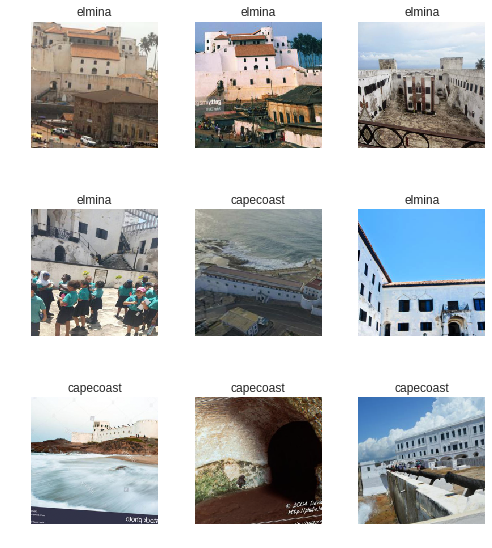

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['capecoast', 'elmina'], 2, 229, 57)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:06, 13288178.95it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,0.807348,0.679688,0.315789,00:07
2,0.763562,0.569985,0.280702,00:05
3,0.680951,0.487449,0.228070,00:05
4,0.611987,0.491890,0.228070,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


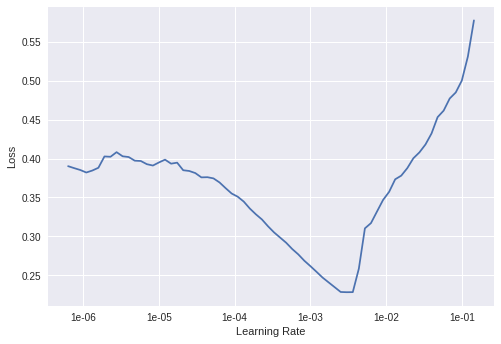

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,time
1,2.027909,571.807983,0.333333,00:04
2,2.455903,68.968796,0.333333,00:05
3,2.447868,56.088009,0.350877,00:06
4,2.112566,27.377737,0.456140,00:05


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (229 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
capecoast,capecoast,capecoast,capecoast,capecoast
Path: data/castles;

Valid: LabelList (57 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
capecoast,elmina,elmina,elmina,elmina
Path: data/castles;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

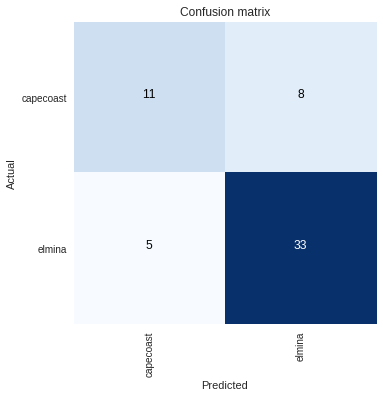

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('capecoast', 'elmina', 8), ('elmina', 'capecoast', 5)]

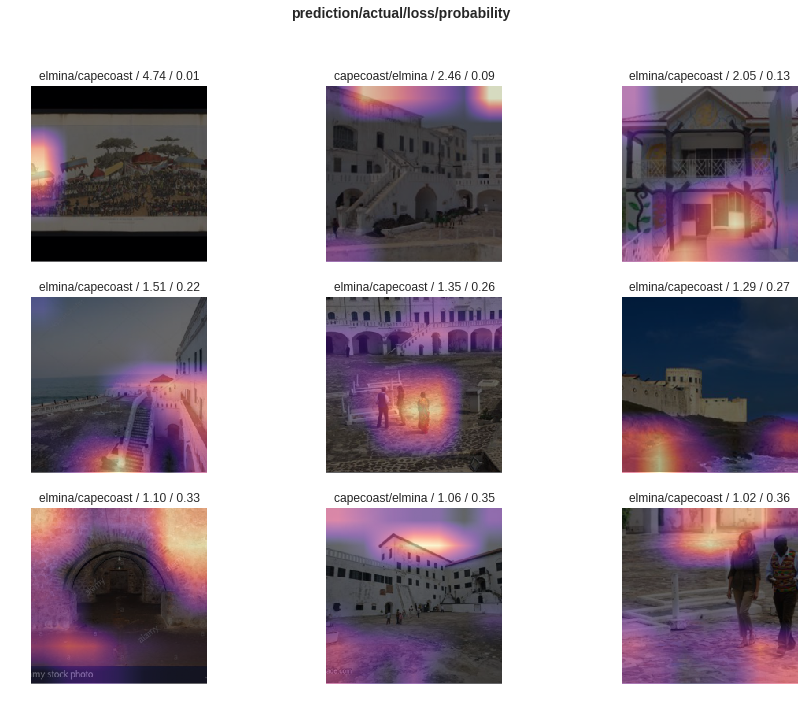

In [0]:
interp.plot_top_losses(9, figsize=(15,11))